# Machine Learning
# Logistic Regression using Gradient Descent (with Regularization)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy
%matplotlib inline

# Importing Data

In [6]:
df = pd.read_csv("sonar.csv", header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0190,0.0038,0.0642,0.0452,0.0333,0.0690,0.0901,0.1454,0.0740,0.0349,...,0.0093,0.0118,0.0112,0.0094,0.0140,0.0072,0.0022,0.0055,0.0122,Rock
1,0.0151,0.0320,0.0599,0.1050,0.1163,0.1734,0.1679,0.1119,0.0889,0.1205,...,0.0061,0.0015,0.0084,0.0128,0.0054,0.0011,0.0019,0.0023,0.0062,Rock
2,0.0712,0.0901,0.1276,0.1497,0.1284,0.1165,0.1285,0.1684,0.1830,0.2127,...,0.0154,0.0156,0.0054,0.0030,0.0048,0.0087,0.0101,0.0095,0.0068,Mine
3,0.1088,0.1278,0.0926,0.1234,0.1276,0.1731,0.1948,0.4262,0.6828,0.5761,...,0.0455,0.0213,0.0082,0.0124,0.0167,0.0103,0.0205,0.0178,0.0187,Mine
4,0.0086,0.0215,0.0242,0.0445,0.0667,0.0771,0.0499,0.0906,0.1229,0.1185,...,0.0072,0.0054,0.0022,0.0016,0.0029,0.0058,0.0050,0.0024,0.0030,Rock


In [7]:
# Changing labels to 0 and 1

df[60] = df[60].replace('Mine', 1)
df[60] = df[60].replace('Rock', 0)
df[60].head()

0    0
1    0
2    1
3    1
4    0
Name: 60, dtype: int64

In [8]:
# Creating Features and Target data sets

data = df.drop(60, axis=1)
labels = df[60].values

## (a) Logistic Regression using Gradient Descent

In [28]:
def Regularized_gradient_descent(data, labels, y, weights, eta, lambda_par):

    for k in range(len(data.columns)+1): # For the weights
        
        if k == 60:
            summation = (labels - y).sum()
            weights[k] = weights[k] + eta*summation
            
        else:        
            summation = ((labels - y)*data[k]).sum()
            weights[k] = weights[k] + eta*(summation - lambda_par*weights[k])

    return weights

In [29]:
def Regularized_cross_entropy_err(labels, y, weights, lambda_par):
    error = 0
    for i in range(len(y)):
        if y[i] < (np.exp(-16)):
            y[i] = np.exp(-16)
           
        if y[i] > 1 - np.exp(-16):
            y[i] = (1 - np.exp(-16))
            
        error += (labels[i] * math.log(y[i])) + ((1 - labels[i]) * math.log(1 - y[i]))
    reg_ex = (lambda_par/2)*(weights**2).sum()
    cross_entropy_err = -error + reg_ex
            
    return cross_entropy_err

In [37]:
def Reg_Logistic_Regression(data, labels, iterations, eta, lambda_par):
    
    master_err = []
    intial_weight = 0.5
    weights = np.array([intial_weight]*61)
    
    for i in range(iterations):
        
        
        y = np.empty(len(data))    
        
        #Iterating over the data
        for t in range(len(data)): # No. of examples
            
            prod = np.matmul(weights[:60], data.iloc[t])
                
            gx = prod + weights[60]
            if -gx > 700:
                gx = -700
            #print gx
        
            sigmoid = 1 / (1 + math.exp(-gx))
            y[t] = sigmoid
            
        weights = Regularized_gradient_descent(data, labels, y, weights, eta, lambda_par)
        
        # Cross entropy error
        error = Regularized_cross_entropy_err(labels, y, weights, lambda_par)
        master_err.append(error)    
        
    # Predicting from final weights
    pred = predict(data, weights)
    
    # Cross entropy error
    error = Regularized_cross_entropy_err(labels, y, weights, lambda_par)
        
    # Training error
    cl_err = classification_error(labels, pred)
    
    # L2 - norm
    l2_norm = np.sqrt((weights ** 2).sum())
    
    return cl_err, master_err, l2_norm

In [38]:
def classification_error(labels, predictions):
    wrong = 0.0
    for i in range(len(labels)):
        if labels[i] != predictions[i]:
            wrong += 1
    return wrong/len(labels)*100

In [39]:
def predict(data, weights):
    
    pred = np.empty(len(data))
    
    for t in range(len(data)): # No. of examples
        
        prod = np.matmul(weights[:60], data.iloc[t])
        gx = prod + weights[60]

        sigmoid = 1 / (1 + math.exp(-gx))
        
        # Classifying
        if sigmoid < 0.5:
            y = 0
        else:
            y = 1

        pred[t] = y
        
    return pred

### (i) For different values of 'eta', keeping lambda at 0 for now

eta = 0.001
Training Error:			28.3333333333
Cross-Entropy Error:		102.836582726
L2-Norm (||w||_2):		2.6879348023 

eta = 0.01
Training Error:			36.1111111111
Cross-Entropy Error:		161.046008898
L2-Norm (||w||_2):		6.83304236844 

eta = 0.05
Training Error:			36.1111111111
Cross-Entropy Error:		622.443565007
L2-Norm (||w||_2):		33.0061163532 

eta = 0.1
Training Error:			36.6666666667
Cross-Entropy Error:		845.287304772
L2-Norm (||w||_2):		65.4295363767 

eta = 0.5
Training Error:			36.6666666667
Cross-Entropy Error:		1048.82843422
L2-Norm (||w||_2):		326.086921126 

eta = 1.0
Training Error:			36.6666666667
Cross-Entropy Error:		1063.02612577
L2-Norm (||w||_2):		652.837306882 

eta = 1.5
Training Error:			36.6666666667
Cross-Entropy Error:		1064.48871411
L2-Norm (||w||_2):		979.175763905 



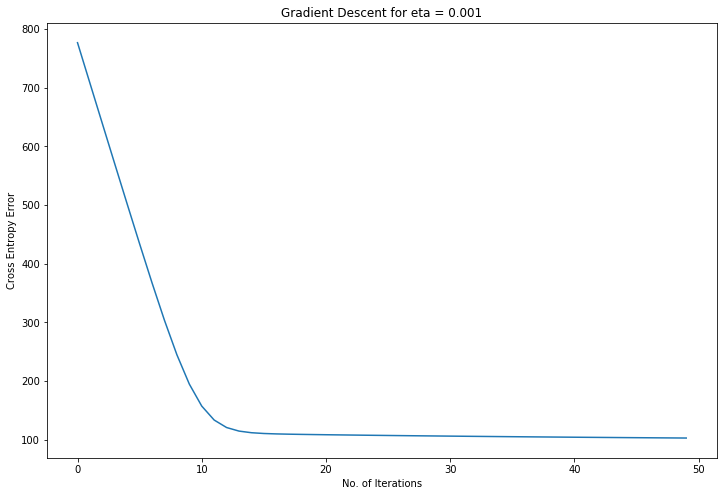

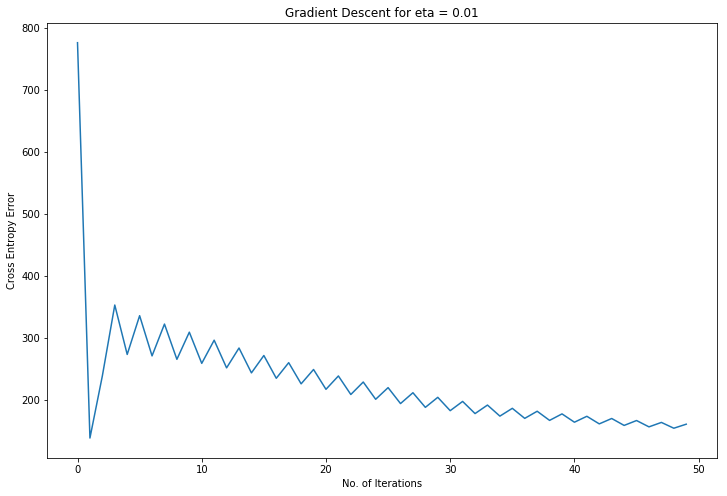

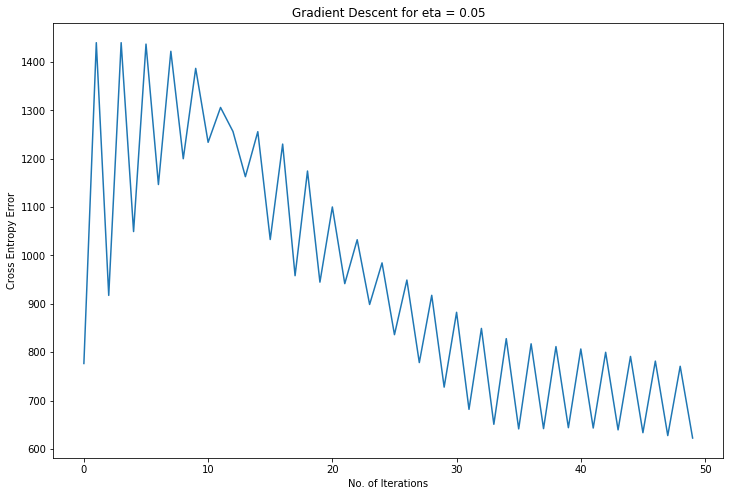

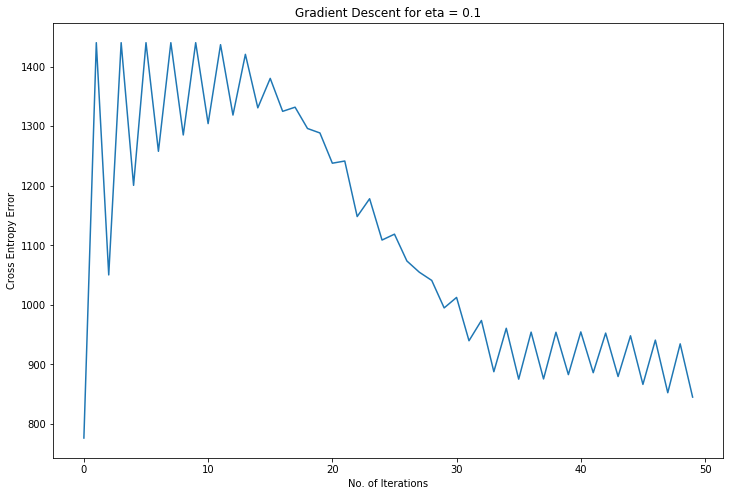

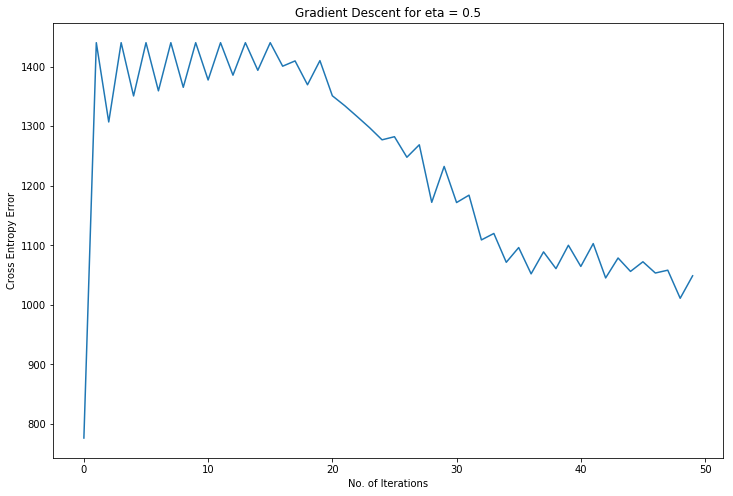

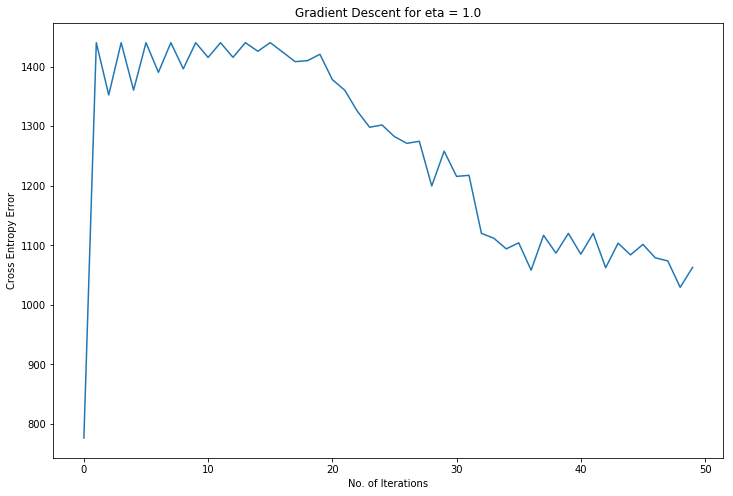

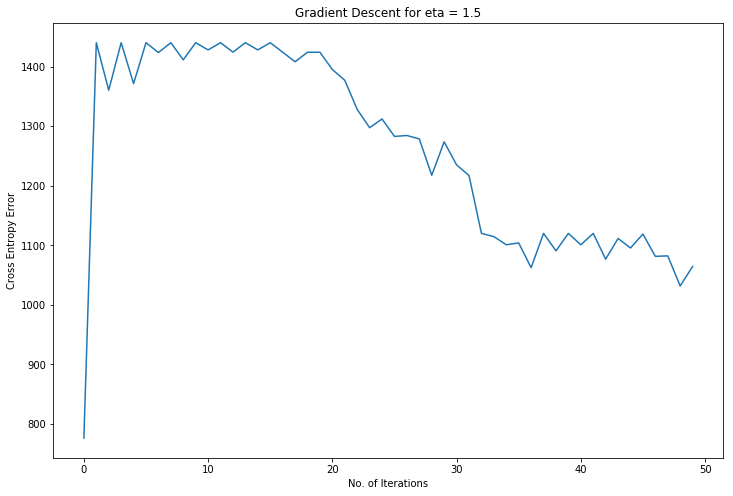

In [41]:
# Running the Logistic Regression function

eta_values = [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 1.5]
lambda_par = 0

for eta in eta_values: 
    print "eta =", eta   
    tr_err, ce_error, l2 = Reg_Logistic_Regression(data, labels, 50, eta, lambda_par)
    print "Training Error:\t\t\t", tr_err
    print "Cross-Entropy Error:\t\t", ce_error[len(ce_error)-1]
    print "L2-Norm (||w||_2):\t\t", l2, "\n"
    
    # Plotting the figures of Cross Entropy vs Iterations at different values of 'eta'
    plt.figure(figsize=(12, 8))
    plt.xlabel("No. of Iterations")
    plt.ylabel("Cross Entropy Error")
    plt.plot(ce_error)
    plt.title("Gradient Descent for eta = {}".format(eta))

### (i) Regularized Logistic Regression with different values of 'lambda'

In [44]:
# Running the Regularized Logistic Regression function

lambda_parameters = [0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]

for lambda_par in lambda_parameters: 
    print "LAMBDA =", lambda_par
    tr_err, ce_error, l2 = Reg_Logistic_Regression(data, labels, 50, 0.001, lambda_par)
    print "Training Error:\t\t\t", tr_err
    print "Cross-Entropy Error:\t\t", ce_error[len(ce_error)-1]
    print "L2-Norm (||w||_2):\t\t", l2, "\n"

LAMBDA = 0
Training Error:			28.3333333333
Cross-Entropy Error:		102.836582726
L2-Norm (||w||_2):		2.6879348023 

LAMBDA = 0.05
Training Error:			28.3333333333
Cross-Entropy Error:		103.035050109
L2-Norm (||w||_2):		2.68208111258 

LAMBDA = 0.1
Training Error:			28.3333333333
Cross-Entropy Error:		103.231981267
L2-Norm (||w||_2):		2.67624195359 

LAMBDA = 0.2
Training Error:			28.3333333333
Cross-Entropy Error:		103.621277219
L2-Norm (||w||_2):		2.66460708583 

LAMBDA = 0.3
Training Error:			27.7777777778
Cross-Entropy Error:		104.004554528
L2-Norm (||w||_2):		2.65302991598 

LAMBDA = 0.4
Training Error:			27.7777777778
Cross-Entropy Error:		104.381896069
L2-Norm (||w||_2):		2.64151016233 

LAMBDA = 0.5
Training Error:			27.7777777778
Cross-Entropy Error:		104.753383655
L2-Norm (||w||_2):		2.63004754456 



### Cross-Validation

In [53]:
def cross_validation(df, labels, lambda_par):
    Folds = {}
    test = pd.DataFrame()
    master_tr_err = []
    master_ce_error = []
    master_testing_err = []
    master_l2 = []
    Folds[0], Folds[1], Folds[2], Folds[3], Folds[4] = np.array_split(df, 5)

    # Loop for different folds
    for i in range(5):
        # making current fold as the test-set
        test = Folds[i]

        # pointer for training-set
        j = 0
        train = pd.DataFrame()
        # Loop to combine the training sets
        while j < 5:
            if i == j:
                j += 1
            else:
                #print j
                train = train.append(Folds[j])
                j += 1

        X_train = train.drop(60, axis=1)
        labels_train = train[60].values
        tr_err, ce_error, l2 = Reg_Logistic_Regression(X_train, labels_train, 50, 0.001, lambda_par)


        X_test = test.drop(60, axis=1)
        labels_test = test[60].values
        pred = predict(X_test, weights)
        
        correct_pred = np.where(np.equal(pred, labels_test))[0]
        accuracy = float(len(correct_pred))/float(len(labels_test))
        testing_err = 1 - accuracy
        
        ce_error = ce_error[len(ce_error)-1]

        print "Fold:", i+1
        master_tr_err.append(tr_err)
        print "\tTraining Error:\t\t\t", tr_err
        master_testing_err.append(testing_err)
        print "\tTesting Error:\t\t\t", testing_err
        master_ce_error.append(ce_error)
        print "\tCross-Entropy Error:\t\t", ce_error
        master_l2.append(l2)
        print "\tL2-Norm:\t\t\t", l2

    print "\nMean Training Error:\t\t\t", np.mean(master_tr_err)
    print "Mean Testing Error:\t\t\t", np.mean(master_testing_err)
    print "Mean Cross-Entropy Error:\t\t", np.mean(master_ce_error)
    print "Mean L2-Norm (||w||_2):\t\t\t", np.mean(master_l2)

### (ii) Cross-validation with different values of 'lambda'

In [55]:
lambda_parameters = [0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
for lambda_par in lambda_parameters:
    print "\nLAMBDA =", lambda_par, "\n"
    cross_validation(df, labels, lambda_par)


LAMBDA = 0 

Fold: 1
	Training Error:			28.4722222222
	Testing Error:			0.388888888889
	Cross-Entropy Error:		82.9779138878
	L2-Norm:			2.65485846906
Fold: 2
	Training Error:			31.9444444444
	Testing Error:			0.388888888889
	Cross-Entropy Error:		85.3605348745
	L2-Norm:			2.6035132673
Fold: 3
	Training Error:			29.8611111111
	Testing Error:			0.333333333333
	Cross-Entropy Error:		82.5420978053
	L2-Norm:			2.65851310049
Fold: 4
	Training Error:			27.7777777778
	Testing Error:			0.416666666667
	Cross-Entropy Error:		82.1903527483
	L2-Norm:			2.65305863023
Fold: 5
	Training Error:			27.7777777778
	Testing Error:			0.305555555556
	Cross-Entropy Error:		82.697379364
	L2-Norm:			2.65392095216

Mean Training Error:			29.1666666667
Mean Testing Error:			0.366666666667
Mean Cross-Entropy Error:		83.153655736
Mean L2-Norm (||w||_2):			2.64477288385

LAMBDA = 0.05 

Fold: 1
	Training Error:			28.4722222222
	Testing Error:			0.388888888889
	Cross-Entropy Error:		83.1684442742
	L2-Norm:			2.648916